In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm as tqdm
from matplotlib import pyplot as plt


day_i = pd.read_csv('data/Metro_train/record_2019-01-2.csv')


In [11]:
day_i = pd.read_csv('data/Metro_train/record_2019-01-28.csv')
print(day_i.shape[0]/2)

1202447.0


In [12]:
# 统计进出站每天的变化情况
daily_count = []
for i in tqdm(list(range(21,27))+[28]):
    if i<10:
        s = '0'+str(i)
    else:
        s = str(i)
    day_i = pd.read_csv('data/Metro_train/record_2019-01-%s.csv'%s)
    daily_count.append(day_i.shape[0])

100%|██████████| 7/7 [00:16<00:00,  2.26s/it]


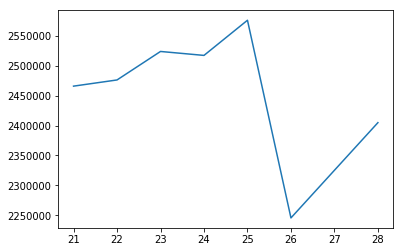

In [13]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(list(range(21,27))+[28],daily_count)
plt.show()

In [61]:
pd.read_csv('data/Metro_testA/testA_record_2019-01-28.csv').shape[0]

2404894

In [18]:
# 数据周期性分布
# 数据可能受天气等因素影响
# TODO
# 统计天气信息/活动信息（百度搜索量）

In [13]:
day_i.dtypes

time         datetime64[ns]
lineID               object
stationID             int64
deviceID              int64
status                int64
userID               object
payType               int64
dtype: object

In [25]:
s = '19'
day_i = pd.read_csv('data/Metro_train/record_2019-01-%s.csv'%s)
day_i['time'] = pd.to_datetime(day_i.time)
day_i['minute_count'] = (day_i['time'].dt.minute+day_i['time'].dt.hour*60)//10

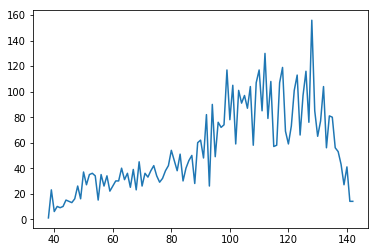

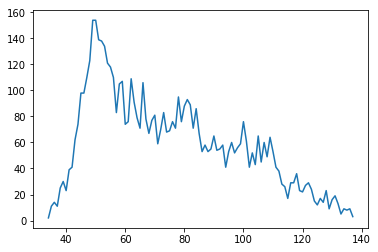

In [26]:
# 统计某天内某个站点的客流分布情况
sid = 1
for i in range(0,2):
    come = day_i[(day_i.stationID==sid) &(day_i.status==i)]
    come = come[['minute_count','status']].groupby(['minute_count'],as_index=False).agg({'status':'count'})

    plt.figure()
    plt.plot(come['minute_count'],come['status'])
    plt.show()

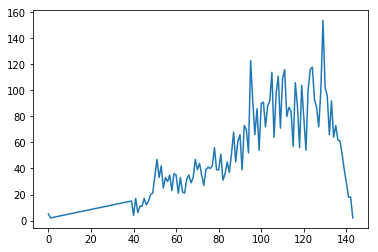

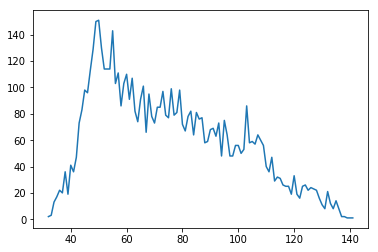

In [24]:
# 统计某天内某个站点的客流分布情况
sid = 1
for i in range(0,2):
    come = day_i[(day_i.stationID==sid) &(day_i.status==i)]
    come = come[['minute_count','status']].groupby(['minute_count'],as_index=False).agg({'status':'count'})

    plt.figure()
    plt.plot(come['minute_count'],come['status'])
    plt.show()

  0%|          | 0/4 [00:00<?, ?it/s]

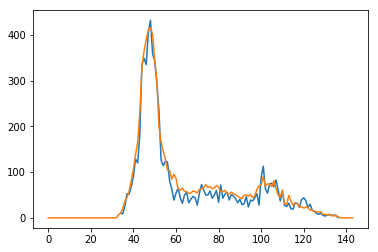

 25%|██▌       | 1/4 [00:03<00:09,  3.04s/it]

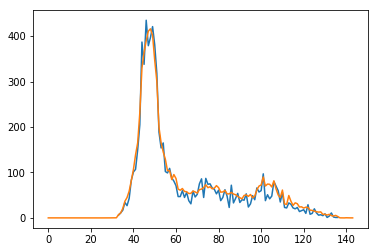

 50%|█████     | 2/4 [00:06<00:06,  3.04s/it]

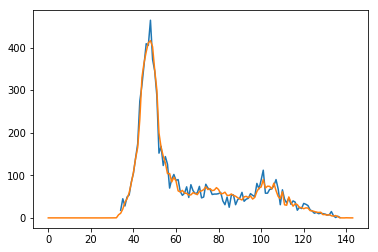

 75%|███████▌  | 3/4 [00:09<00:03,  3.14s/it]

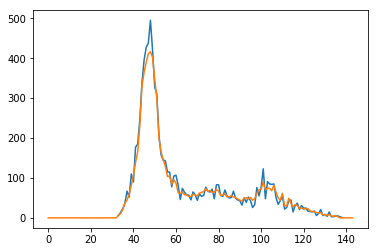

100%|██████████| 4/4 [00:12<00:00,  3.20s/it]


In [22]:
for i in tqdm([8,15,22,21]):
    if i<10:
        s = '0'+str(i)
    else:
        s = str(i)
    day_i = pd.read_csv('data/Metro_train/record_2019-01-%s.csv'%s)
    sid = 34
    day_i['time'] = pd.to_datetime(day_i.time)
    day_i['minute_count'] = (day_i['time'].dt.minute+day_i['time'].dt.hour*60)//10
    for i in range(1,2):
        come = day_i[(day_i.stationID==sid) &(day_i.status==i)]
        come = come[['minute_count','status']].groupby(['minute_count'],as_index=False).agg({'status':'count'})
        data = pd.read_pickle('come.pkl')
        data2 = pd.read_pickle('come2.pkl')
        
        data = data[data.stationID==sid]
        data2 = data2[data2.stationID==sid]
        
        plt.figure()
        plt.plot(come['minute_count'],come['status'])
        plt.plot(data['minute'],data['label'].values*0.7+data2['label'].values*0.3)

        plt.show()

In [5]:
data = pd.read_pickle('out.pkl')
data['label'].describe()

count    11664.000000
mean       101.395334
std        162.000495
min         -0.174903
25%          0.871422
50%         58.115187
75%        126.603808
max       1934.061094
Name: label, dtype: float64

In [8]:
day_i = pd.read_csv('data/Metro_train/record_2019-01-%s.csv'%10)


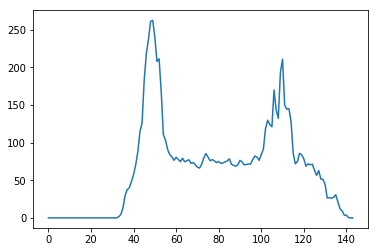

In [17]:
come = pd.read_pickle('come.pkl')
data = come[come.stationID==19]
plt.figure()
plt.plot(data['minute'],data['label'])
plt.show()

In [7]:
come

,minute,stationID,label
2216160,0.0,0,0.022612
2216170,1.0,0,0.001306
2216180,2.0,0,0.046828
2216190,3.0,0,0.066745
2216200,4.0,0,-0.000624
2216210,5.0,0,-0.002078
2216220,6.0,0,0.000047
2216230,7.0,0,0.000029
2216240,8.0,0,-0.002097
2216250,9.0,0,-0.000057


In [70]:
value = []
for i in tqdm(range(1,26)):
    if i<10:
        s = '0'+str(i)
    else:
        s = str(i)
    day_i = pd.read_csv('data/Metro_train/record_2019-01-%s.csv'%s)
    sid = 9
    day_i['time'] = pd.to_datetime(day_i.time)
    day_i['minute_count'] = (day_i['time'].dt.minute+day_i['time'].dt.hour*60)//10
    
    for i in range(0,1):
        come = day_i[(day_i.stationID==sid) &(day_i.status==i)]
        come = come[['minute_count','status']].groupby(['minute_count'],as_index=False).agg({'status':'count'})
        value.append(come.loc[come.minute_count==40,'status'].values[0])

100%|██████████| 25/25 [01:15<00:00,  3.29s/it]


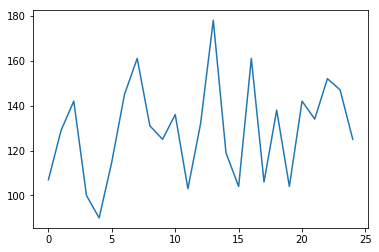

In [71]:
plt.figure()
plt.plot(value)
plt.show()

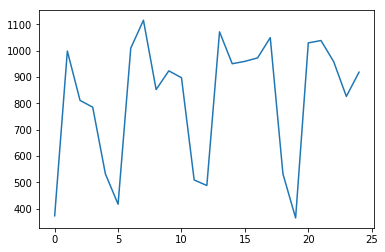

In [19]:
plt.figure()
plt.plot(value)
plt.show()

In [ ]:
1 baseline 昨天同时刻的流量
2 周期性规律
    节点及相似节点周一到周二的流量变化情况
        区分正常周期调整和突发情况
            每10个（若干个）相似节点确定周期因素，比如中位数
3 天气
4 春节波动趋势

In [ ]:
2 根据上一天的特征预测下一天的流量,end2end
f1:上一天此刻的流量
f2:上一天此刻(n时刻(半小时/附近三小时)范围内的流量)
f3:上一天该站总流量
f5:上一天该线路总流量
f6:上一天该线路该时刻总流量
f7:上一天该节点附近节点流入总流量
f8:上一天该节点附近节点该时刻流入总流量

f4:周几?
f9:时刻
f12:第几周

f10:上一天该时刻数据的可信度
f25:上一天该时刻最多进站站台
f26:上一天该时刻进站最多目标出站站台(f23的max和std)
    
f11:该站台进站口个数+出站口个数
f13:站台的邻居个数
    
f14:上一天乘客该时刻刷卡类型
f15:上一天乘客该时间段刷卡类型
    
f21:上一天非周期用户的数量(一天只有两次刷卡)
f22:上一天该站台最常见出站台
f23:上一天该站台全部站出站台人数
f24:上一天该站台全部站进站台人数
分时刻重复上述特征
    
# 进出站交互特征
f17:上一天该时刻进出站总人数
f18:上一天该时间段进出站总人数
f19:上一天该站总进出流量

f20:上一天天气情况
    


In [ ]:
? 数据过小的问题
解决办法-每分钟都滚动出一个10分钟间隔实现数据增强.
? 训练数据建模选取的问题
解决办法-数据模型融合stack
model1 周一预测周二 end2end
model2 第一天预测第二天(周一到周五) 解决model1数据过少的问题
model3 第一天预测第二天(周一到周末) *不推荐



In [ ]:
# 模型递进
TODO list
1 补充全量数据
2 模型参数多样化
3 数据模型多样化
    4/3/2/1
3.5 xgboost
4 写一个nn
5 高峰预测
6 贝叶斯优化
7 融合
8 睡觉
method